<a href="https://colab.research.google.com/github/emolinaperez/econometrics_mek/blob/main/Week%2011/R/Week11_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 11: Econometrics

In [1]:
install.packages('quantreg')
install.packages('AER')
install.packages('mvtnorm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(quantreg)
library(ggplot2)
library(AER)
library(MASS)
library(mvtnorm)

Loading required package: SparseM

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:quantreg’:

    untangle.specials




# Quantile regressions

In mircoeconomics, an Engel curve (named after German statistician Ernst Engel) describes how household expenditure  on a particular good or service varies with household income. Engel collected food expenditure vs household income for a sample of 235 19th century working class Belgian households


In [3]:
data(engel)
attach(engel)

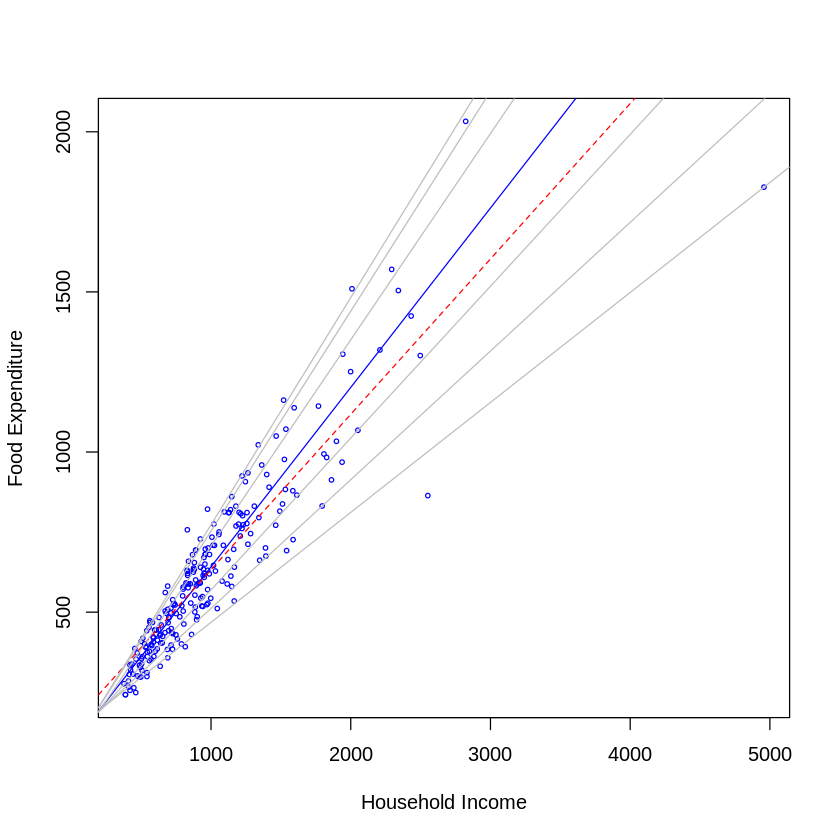

In [4]:
plot(income,foodexp,cex=.25,type="n",xlab="Household Income", ylab="Food Expenditure")
points(income,foodexp,cex=.5,col="blue")
abline(rq(foodexp~income,tau=.5),col="blue")
abline(lm(foodexp~income),lty=2,col="red") #the dreaded ols line
taus = c(.05,.1,.25,.75,.90,.95)
for( i in 1:length(taus)){
  abline(rq(foodexp~income,tau=taus[i]),col="gray")
 }

In [5]:
#analyze estimates
summary(rq(foodexp~income,tau=taus[1]))



Call: rq(formula = foodexp ~ income, tau = taus[1])

tau: [1] 0.05

Coefficients:
            coefficients lower bd  upper bd 
(Intercept) 124.88004     98.30212 130.51695
income        0.34336      0.34333   0.38975

Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”
Warning message in rq.fit.br(x, y, tau = tau, ci = TRUE, ...):
“Solution may be nonunique”


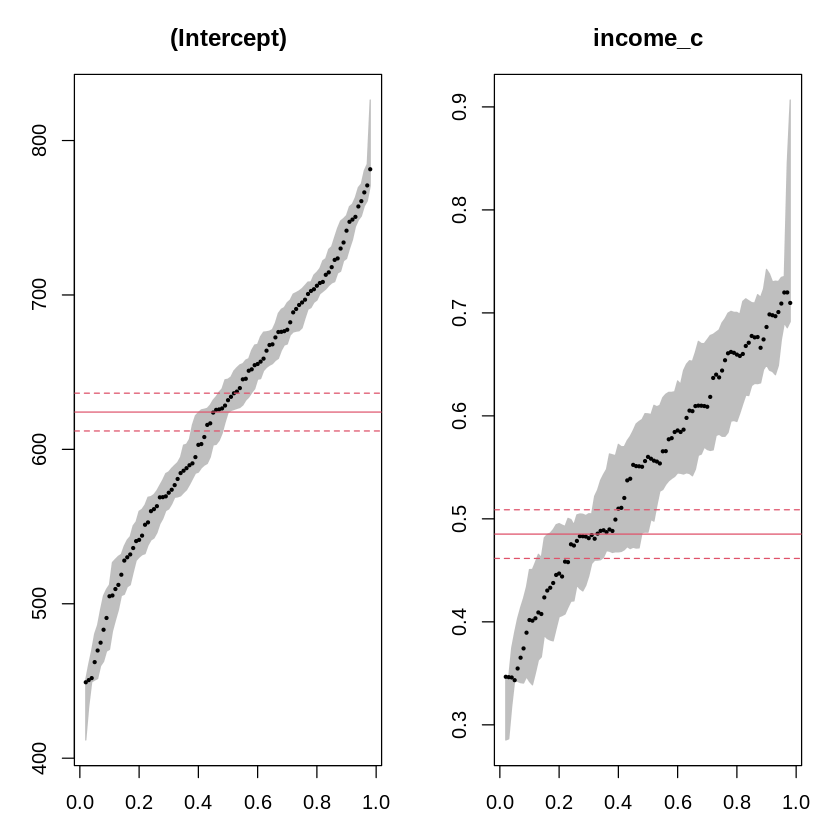

In [6]:
#Plot the slope and intercept of the estimated quantile regression for the Engel data as a function of quantile
income_c <- income - mean(income)
fit1 <- summary(rq(foodexp~income_c,tau=2:98/100))
fit2 <- summary(rq(foodexp~income_c,tau=c(.05, .25, .5, .75, .95)))
plot(fit1,mfrow = c(1,2))

# Probit regression

In [7]:
mydata <- read.csv("https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%2011/data/lab11_data.csv")
head(mydata)

,X,admit,gre,gpa,rank
,<int>,<int>,<int>,<dbl>,<int>
1,1,0,380,3.61,3
2,2,1,660,3.67,3
3,3,1,800,4.00,1
4,4,1,640,3.19,4
5,5,0,520,2.93,4
6,6,1,760,3.00,2


In [8]:
## convert rank to a factor (categorical variable)
mydata$rank <- factor(mydata$rank)

In [9]:
## view first few rows
head(mydata)

,X,admit,gre,gpa,rank
,<int>,<int>,<int>,<dbl>,<fct>
1,1,0,380,3.61,3
2,2,1,660,3.67,3
3,3,1,800,4.00,1
4,4,1,640,3.19,4
5,5,0,520,2.93,4
6,6,1,760,3.00,2


In [10]:
summary(mydata)

       X             admit             gre             gpa        rank   
 Min.   :  1.0   Min.   :0.0000   Min.   :220.0   Min.   :2.260   1: 61  
 1st Qu.:100.8   1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   2:151  
 Median :200.5   Median :0.0000   Median :580.0   Median :3.395   3:121  
 Mean   :200.5   Mean   :0.3175   Mean   :587.7   Mean   :3.390   4: 67  
 3rd Qu.:300.2   3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670          
 Max.   :400.0   Max.   :1.0000   Max.   :800.0   Max.   :4.000          

In [11]:
xtabs(~rank + admit, data = mydata)

    admit
rank  0  1
   1 28 33
   2 97 54
   3 93 28
   4 55 12

In [12]:
# estimate the probit model
myprobit <- glm(admit ~ gre + gpa + rank, family = binomial(link = "probit"),
    data = mydata)

In [13]:
## model summary
summary(myprobit)


Call:
glm(formula = admit ~ gre + gpa + rank, family = binomial(link = "probit"), 
    data = mydata)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.386836   0.673946  -3.542 0.000398 ***
gre          0.001376   0.000650   2.116 0.034329 *  
gpa          0.477730   0.197197   2.423 0.015410 *  
rank2       -0.415399   0.194977  -2.131 0.033130 *  
rank3       -0.812138   0.208358  -3.898 9.71e-05 ***
rank4       -0.935899   0.245272  -3.816 0.000136 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.41  on 394  degrees of freedom
AIC: 470.41

Number of Fisher Scoring iterations: 4


In the output above, the first thing we see is the call, this is R reminding us what the model we ran was, what options we specified, etc.
Next we see the deviance residuals, which are a measure of model fit. This part of output shows the distribution of the deviance residuals for individual cases used in the model. Below we discuss how to use summaries of the deviance statistic to asses model fit.
The next part of the output shows the coefficients, their standard errors, the z-statistic (sometimes called a Wald z-statistic), and the associated p-values. Both gre, gpa, and the three terms for rank are statistically significant. The probit regression coefficients give the change in the z-score or probit index for a one unit change in the predictor.
For a one unit increase in gre, the z-score increases by 0.001.
For each one unit increase in gpa, the z-score increases by 0.478.
The indicator variables for rank have a slightly different interpretation. For example, having attended an undergraduate institution of rank of 2, versus an institution with a rank of 1 (the reference group), decreases the z-score by 0.415.
Below the table of coefficients are fit indices, including the null and deviance residuals and the AIC.


In [14]:
#We can use the confint function to obtain confidence intervals for the coefficient estimates. These will be profiled confidence intervals by default, created by profiling the likelihood function. As such, they are not necessarily symmetric.
confint(myprobit)


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-3.7201050682,-1.076327713
gre,0.0001104101,0.002655157
gpa,0.0960654793,0.862610221
rank2,-0.7992113929,-0.032995019
rank3,-1.2230955861,-0.405008112
rank4,-1.4234218227,-0.459538829


In [15]:
#You can also use predicted probabilities to help you understand the model. To do this, we first create a data frame containing the values we want for the independent variables.
newdata <- data.frame(gre = rep(seq(from = 200, to = 800, length.out = 100),
    4 * 4), gpa = rep(c(2.5, 3, 3.5, 4), each = 100 * 4), rank = factor(rep(rep(1:4,
    each = 100), 4)))

In [16]:
dim(newdata)

[1] 1600    3

In [17]:
head(newdata)

,gre,gpa,rank
,<dbl>,<dbl>,<fct>
1,200.0000,2.5,1
2,206.0606,2.5,1
3,212.1212,2.5,1
4,218.1818,2.5,1
5,224.2424,2.5,1
6,230.3030,2.5,1


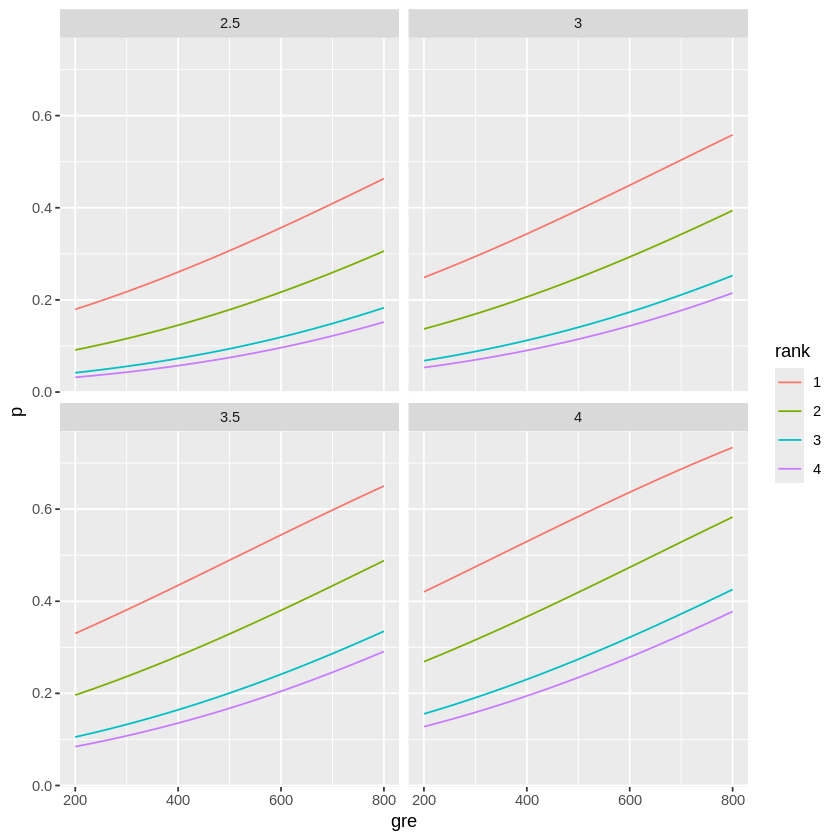

In [18]:
newdata[, c("p", "se")] <- predict(myprobit, newdata, type = "response", se.fit = TRUE)[-3]
ggplot(newdata, aes(x = gre, y = p, colour = rank)) + geom_line() + facet_wrap(~gpa)


Multicollinearity means that two or more regressors in a multiple regression model are strongly correlated.
lm will produce a warning in the first line of the coefficient section of the output (1 not defined because of singularities) and ignore the regressor(s) which is (are) assumed to be a linear combination of the other


In [19]:
# define the fraction of English learners
data("CASchools")
dim(CASchools)
summary(CASchools)

[1] 420  14

   district            school                  county      grades   
 Length:420         Length:420         Sonoma     : 29   KK-06: 61  
 Class :character   Class :character   Kern       : 27   KK-08:359  
 Mode  :character   Mode  :character   Los Angeles: 27              
                                       Tulare     : 24              
                                       San Diego  : 21              
                                       Santa Clara: 20              
                                       (Other)    :272              
    students          teachers          calworks          lunch       
 Min.   :   81.0   Min.   :   4.85   Min.   : 0.000   Min.   :  0.00  
 1st Qu.:  379.0   1st Qu.:  19.66   1st Qu.: 4.395   1st Qu.: 23.28  
 Median :  950.5   Median :  48.56   Median :10.520   Median : 41.75  
 Mean   : 2628.8   Mean   : 129.07   Mean   :13.246   Mean   : 44.71  
 3rd Qu.: 3008.0   3rd Qu.: 146.35   3rd Qu.:18.981   3rd Qu.: 66.86  
 Max.   :27176.0   Max

In [20]:
CASchools$score <- (CASchools$read + CASchools$math)*0.5
CASchools$FracEL <- CASchools$english / 100

In [21]:
# estimate the model
mult.mod <- lm(score ~ computer + english + FracEL, data = CASchools)

In [22]:
# obtain a summary of the model
summary(mult.mod)


Call:
lm(formula = score ~ computer + english + FracEL, data = CASchools)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.492  -9.976  -0.778   8.761  43.798 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 663.704837   0.984259 674.319  < 2e-16 ***
computer      0.005374   0.001670   3.218  0.00139 ** 
english      -0.708947   0.040303 -17.591  < 2e-16 ***
FracEL              NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.43 on 417 degrees of freedom
Multiple R-squared:  0.4291,	Adjusted R-squared:  0.4263 
F-statistic: 156.7 on 2 and 417 DF,  p-value: < 2.2e-16


#Consider two further examples where our selection of regressors induces perfect multicollinearity.

First, assume that we intend to analyze the effect of class size on test score by using a dummy variable that identifies classes which are not small


In [23]:
# if STR smaller 12, NS = 0, else NS = 1
CASchools$NS <- ifelse(CASchools$computer < 0, 0, 1)

In [24]:
# estimate the model
mult.mod <- lm(score ~ computer + english + NS, data = CASchools)

In [25]:
# obtain a model summary
summary(mult.mod)


Call:
lm(formula = score ~ computer + english + NS, data = CASchools)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.492  -9.976  -0.778   8.761  43.798 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 663.704837   0.984259 674.319  < 2e-16 ***
computer      0.005374   0.001670   3.218  0.00139 ** 
english      -0.708947   0.040303 -17.591  < 2e-16 ***
NS                  NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.43 on 417 degrees of freedom
Multiple R-squared:  0.4291,	Adjusted R-squared:  0.4263 
F-statistic: 156.7 on 2 and 417 DF,  p-value: < 2.2e-16


In [26]:
table(CASchools$NS)


  1 
420 

CASchools$NS is a vector of ones and our data set includes observations

This obviously violates assumption 4 of GMTheorem: the observations for the intercept are always 1


Another example of perfect multicollinearity is known as the dummy variable trap.

This may occur when multiple dummy variables are used as regressors.
A common case for this is when dummies are used to sort the data into mutually exclusive categories.

For example, suppose we have spatial information that indicates whether a school is located in the North, West, South or East of the U.S.
We run into problems when trying to estimate a model that includes a constant and all four direction dummies in the model since then for all observations the constant term is a linear combination of the dummies


thus the “dummy variable trap” means not paying attention and falsely including exhaustive dummies and a constant in a regression model


In [27]:
# set seed for reproducibility
set.seed(1)

In [28]:
# generate artificial data on location
CASchools$direction <- sample(c("West", "North", "South", "East"),
                              420,
                              replace = T)

In [29]:
# estimate the model
mult.mod <- lm(score ~ computer + english + direction, data = CASchools)


Y =  beta0 + beta1*Dummy1 +beta2*Dummy2 + beta3*Dummy3

Y =  beta0 + beta1*0 + beta2*1 + beta3*0

In [30]:
# obtain a model summary
summary(mult.mod)


Call:
lm(formula = score ~ computer + english + direction, data = CASchools)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.972  -9.842  -0.308   8.457  45.005 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    662.538986   1.546932 428.292  < 2e-16 ***
computer         0.005410   0.001684   3.213  0.00141 ** 
english         -0.716944   0.041207 -17.399  < 2e-16 ***
directionNorth   2.157124   2.055534   1.049  0.29460    
directionSouth   1.113782   2.063115   0.540  0.58959    
directionWest    1.744607   1.976871   0.883  0.37801    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.46 on 414 degrees of freedom
Multiple R-squared:  0.4308,	Adjusted R-squared:  0.4239 
F-statistic: 62.67 on 5 and 414 DF,  p-value: < 2.2e-16


 Notice that R solves the problem on its own by generating and including the dummies directionNorth, directionSouth and directionWest but omitting directionEast


consider the case where a perfect linear relationship arises from redundant regressors.


In [31]:
# Percentage of english speakers
CASchools$PctES <- 100 - CASchools$english

In [32]:
# estimate the model
mult.mod <- lm(score ~ computer + english + PctES, data = CASchools)

In [33]:
# obtain a model summary
summary(mult.mod)


Call:
lm(formula = score ~ computer + english + PctES, data = CASchools)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.492  -9.976  -0.778   8.761  43.798 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 663.704837   0.984259 674.319  < 2e-16 ***
computer      0.005374   0.001670   3.218  0.00139 ** 
english      -0.708947   0.040303 -17.591  < 2e-16 ***
PctES               NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.43 on 417 degrees of freedom
Multiple R-squared:  0.4291,	Adjusted R-squared:  0.4263 
F-statistic: 156.7 on 2 and 417 DF,  p-value: < 2.2e-16


# Imperfect Multicollinearity

In [34]:
# load packages
#library(MASS)
#install.packages("mvtnorm")
#library(mvtnorm)

In [35]:
# set number of observations
n <- 50

In [36]:
# initialize vectors of coefficients
coefs1 <- cbind("hat_beta_1" = numeric(10000), "hat_beta_2" = numeric(10000))
coefs2 <- coefs1

In [37]:
# set seed
set.seed(1)

In [38]:
# loop sampling and estimation
for (i in 1:10000) {
  # for cov(X_1,X_2) = 0.25
  X <- rmvnorm(n, c(50, 100), sigma = cbind(c(10, 2.5), c(2.5, 10)))
  u <- rnorm(n, sd = 5)
  Y <- 5 + 2.5 * X[, 1] + 3 * X[, 2] + u
  coefs1[i, ] <- lm(Y ~ X[, 1] + X[, 2])$coefficients[-1]

  # for cov(X_1,X_2) = 0.85
  X <- rmvnorm(n, c(50, 100), sigma = cbind(c(10, 8.5), c(8.5, 10)))
  Y <- 5 + 2.5 * X[, 1] + 3 * X[, 2] + u
  coefs2[i, ] <- lm(Y ~ X[, 1] + X[, 2])$coefficients[-1]

}

In [39]:
# obtain variance estimates
diag(var(coefs1))

hat_beta_1 hat_beta_2 
0.05674375 0.05712459

In [40]:
diag(var(coefs2))

hat_beta_1 hat_beta_2 
 0.1904949  0.1909056

 We are interested in the variances which are the diagonal elements. We see that due to the high collinearity, the variances of beta1 and beta2 have more than tripled, meaning it is more difficult to precisely estimate the true coefficients.

